### Problem Statement
### Implement a KNN model to classify the animals into categories
### Introduction:
K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

The algorithm’s learning is:

- Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

- Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

- Non -Parametric: In KNN, there is no predefined form of the mapping function.

In [8]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("C:/Users/tusha/Downloads/KNN/KNN/Zoo.csv")

In [10]:
df.head(3)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


### Data Exploration

In [12]:
zoo = df.copy()
zoo.rename(columns={'animal name':'animal_name'},inplace=True)
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

### Descriptive Analysis

In [15]:
zoo.shape

(101, 18)

In [16]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [17]:
zoo[zoo.duplicated()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


##### There are no null and no duplicate values in our data

In [19]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [20]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

#### zoo['type'] 
- 1 - Mammal
- 2 - Bird
- 3 - Reptile
- 4 - Fish
- 5 - Amphibian
- 6 - Bug
- 7 - Invertebrate
### Data Visualization

In [148]:
# Having a look at the correlation matrix
zoo['animal_name']=zoo['animal_name'].astype('category').cat.codes
zoo.corr()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal_name,1.000000,-0.109112,0.058483,0.113466,-0.138181,0.048277,0.023475,-0.027931,-0.130423,-0.058669,0.080751,0.169083,-0.037985,-0.087070,0.092462,-0.206519,-0.027243,0.080012
hair,-0.109112,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,0.058483,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,0.113466,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,-0.138181,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,0.048277,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,0.023475,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.027931,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,-0.130423,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,-0.058669,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845


<Axes: >

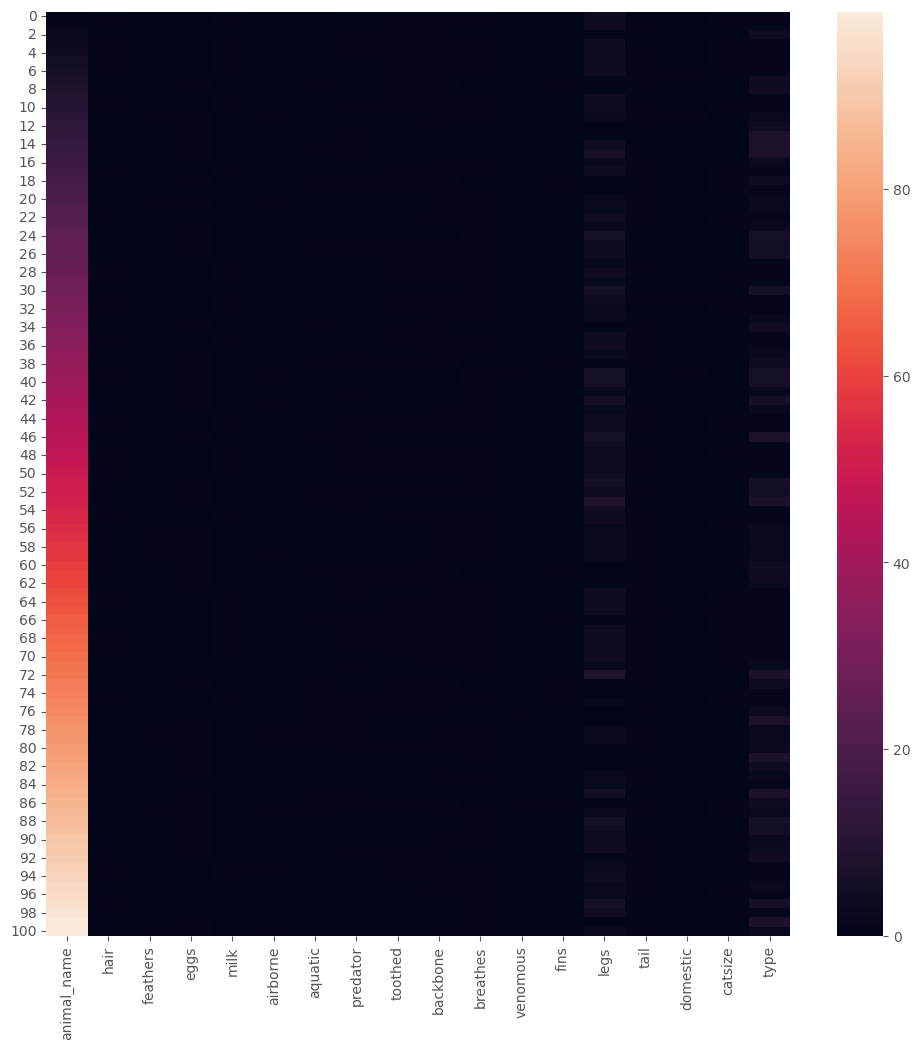

In [154]:
sns.heatmap(zoo)

Text(0.5, 1.0, 'Features for the Animals')

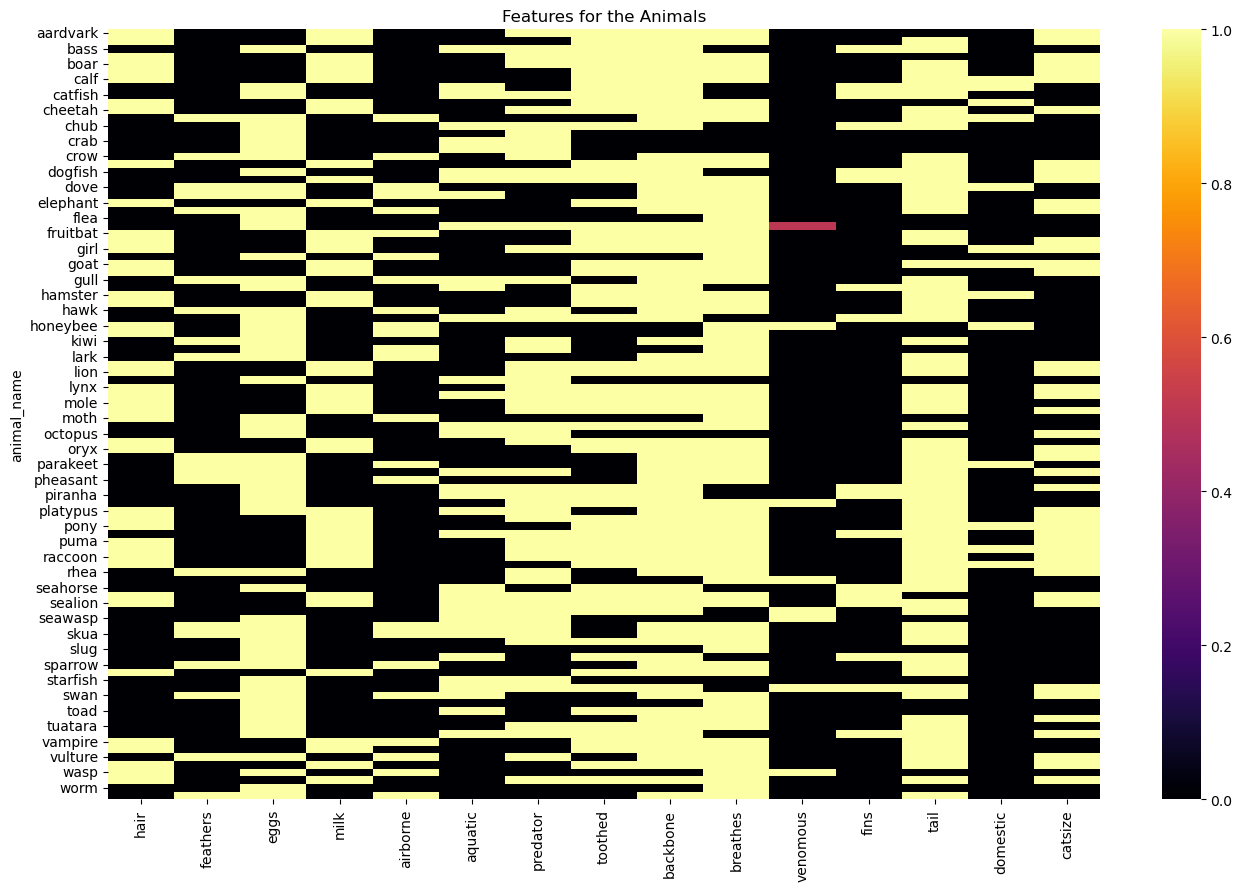

In [59]:
zoo_df = zoo.drop(['type'], axis=1)
zoo_df = zoo_df.groupby(by='animal_name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

Text(0.5, 1.0, 'Features for the Animals')

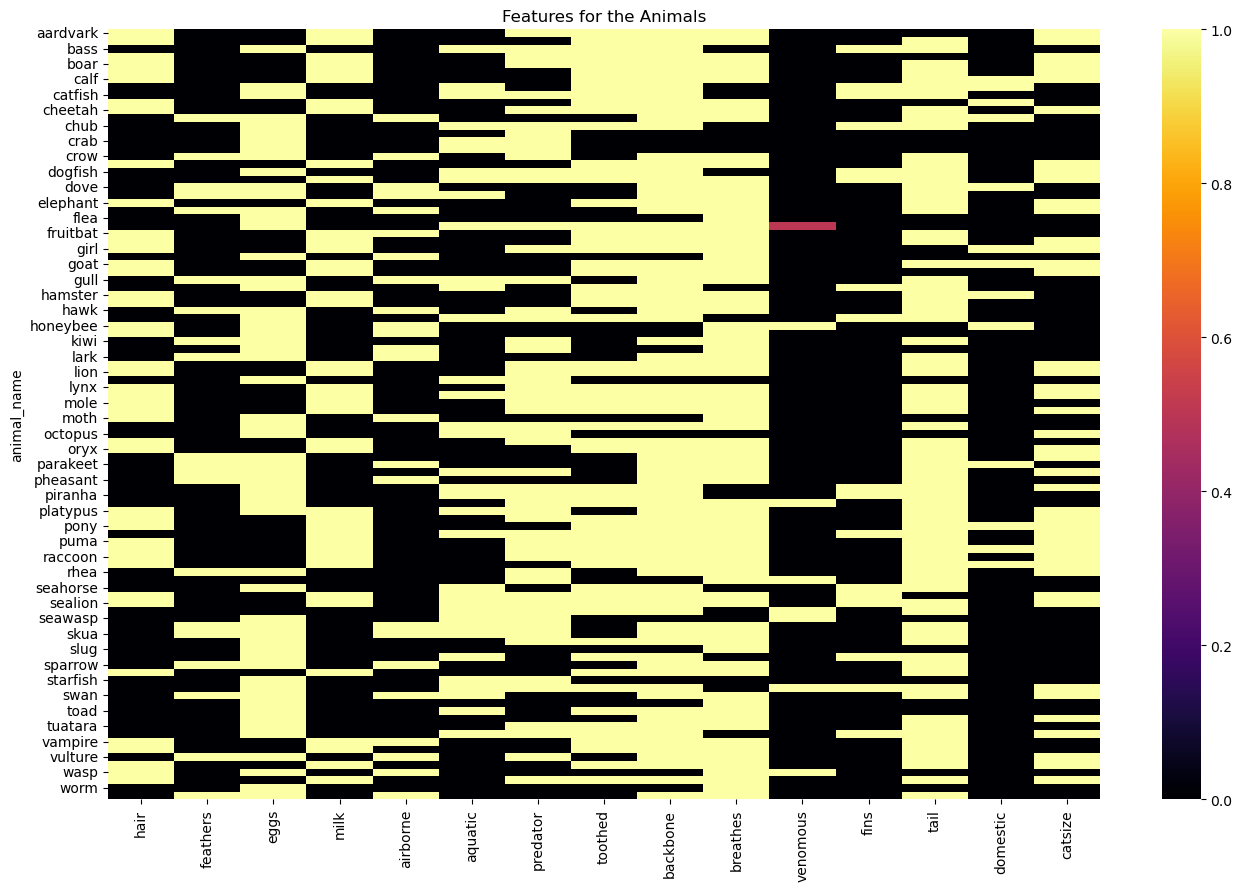

In [61]:
zoo_df_temp = zoo.drop(['legs','type'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='animal_name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()

ax.set_title("Features for the Animals")

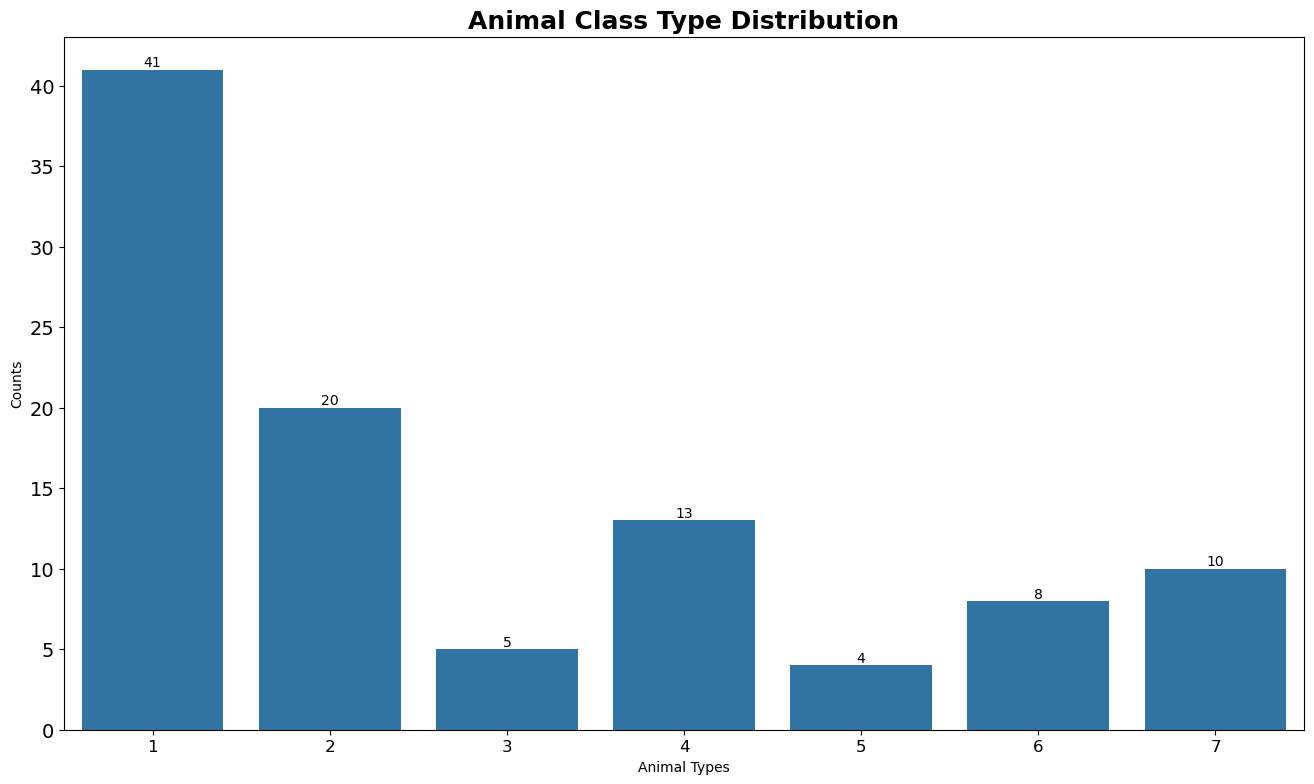

In [62]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = zoo['type'].value_counts().index.tolist(), y = zoo['type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(fontsize = 12)
plt.title("Animal Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

In [64]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

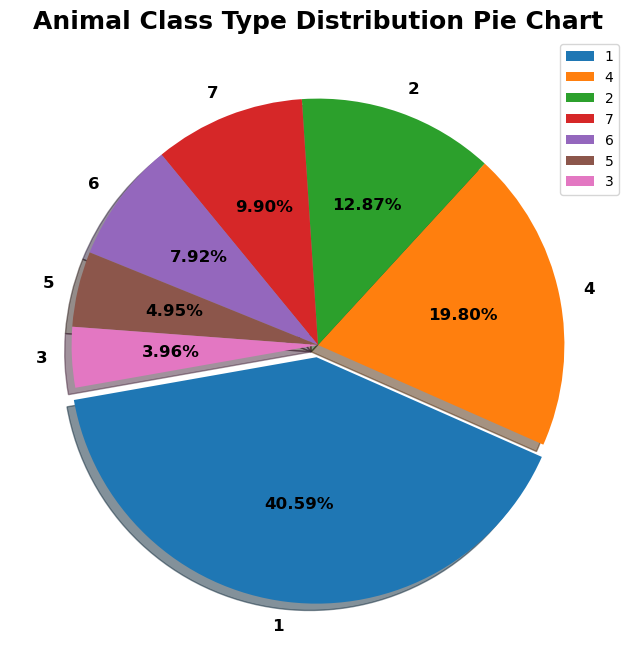

In [67]:
plt.figure(figsize = (12,8))
plt.pie(zoo['type'].value_counts(),
       labels=zoo.type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Animal Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

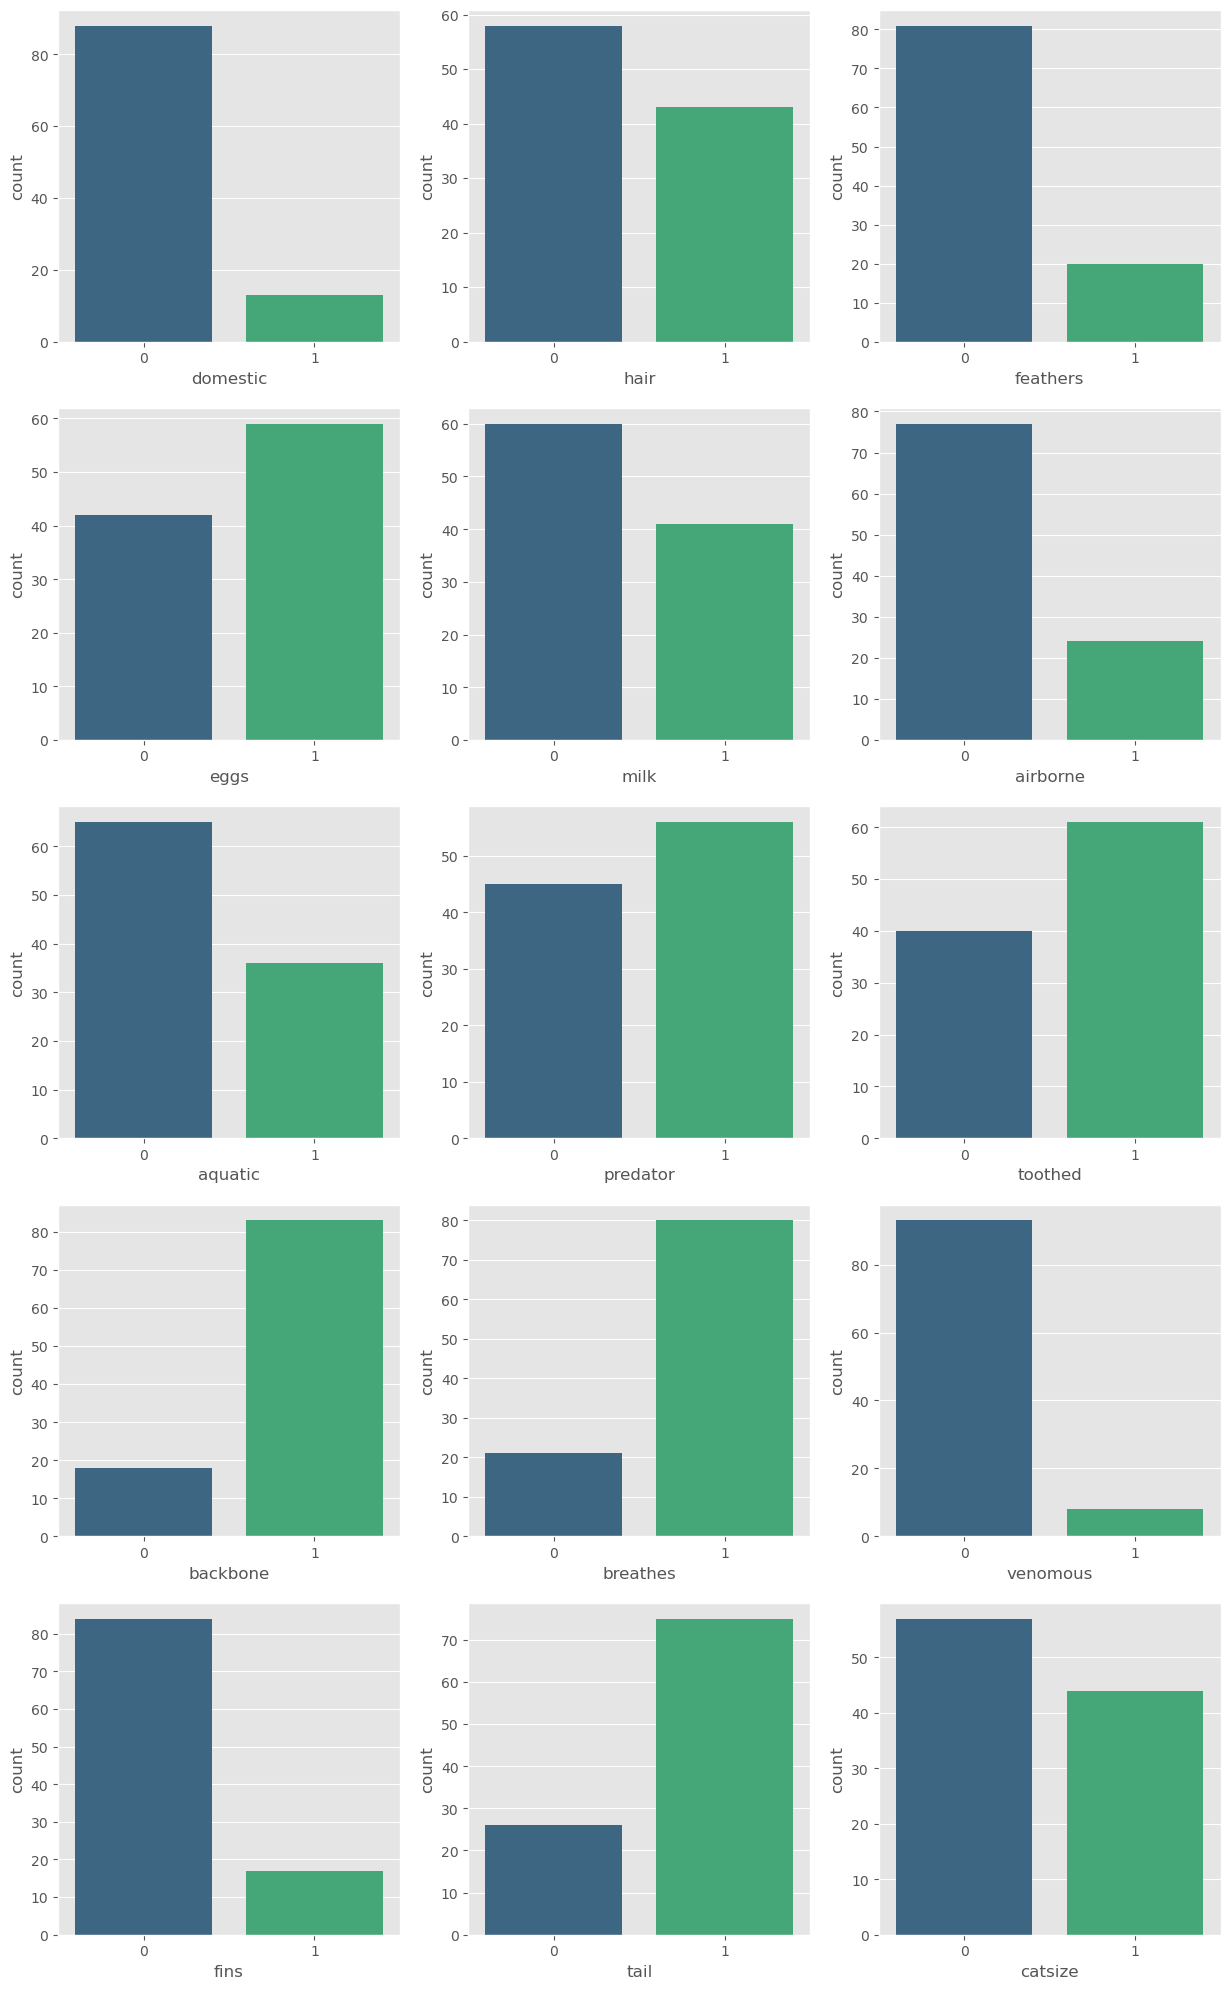

In [69]:
plt.style.use("ggplot")
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(x=zoo["domestic"], palette="viridis", ax=ax[0,0])
sns.countplot(x=zoo["hair"], palette="viridis", ax=ax[0,1])
sns.countplot(x=zoo["feathers"], palette="viridis", ax=ax[0,2])

sns.countplot(x=zoo["eggs"], palette="viridis", ax=ax[1,0])
sns.countplot(x=zoo["milk"], palette="viridis", ax=ax[1,1])
sns.countplot(x=zoo["airborne"], palette="viridis", ax=ax[1,2])

sns.countplot(x=zoo["aquatic"], palette="viridis", ax=ax[2,0])
sns.countplot(x=zoo["predator"], palette="viridis", ax=ax[2,1])
sns.countplot(x=zoo["toothed"], palette="viridis", ax=ax[2,2])

sns.countplot(x=zoo["backbone"], palette="viridis", ax=ax[3,0])
sns.countplot(x=zoo["breathes"], palette="viridis", ax=ax[3,1])
sns.countplot(x=zoo["venomous"], palette="viridis", ax=ax[3,2])

sns.countplot(x=zoo["fins"], palette="viridis", ax=ax[4,0])
sns.countplot(x=zoo["tail"], palette="viridis", ax=ax[4,1])
sns.countplot(x=zoo["catsize"], palette="viridis", ax=ax[4,2]);

### Test Train Split and Cross Validation methods

In [71]:
x = zoo.drop(columns=['type','animal_name'],axis=1)
y = zoo[['type']]

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [76]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (70, 16)
Shape of X_test:  (31, 16)
Shape of y_train:  (70, 1)
Shape of y_test (31, 1)


### Grid search for choosing the best Value of K

In [79]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(31,1)
    score = cross_val_score(knn,x_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [81]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [83]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =10)
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [84]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


### Visualizing the CV results

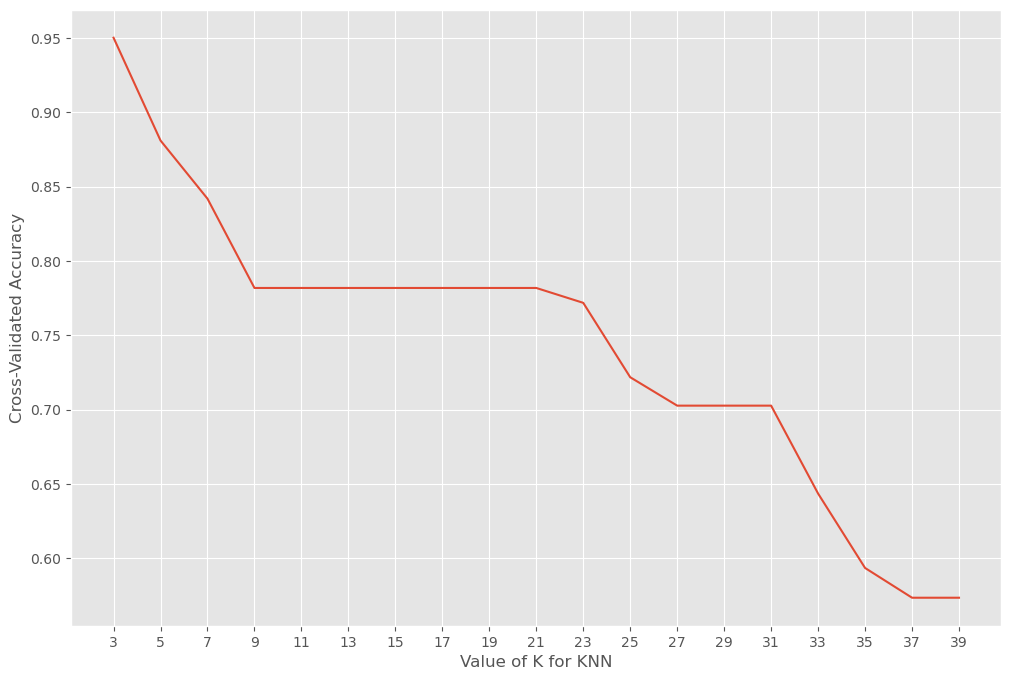

In [88]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [89]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.950000
1,0.880909
2,0.841818
6,0.781818
8,0.781818
7,0.781818
9,0.781818
5,0.781818
4,0.781818
3,0.781818


##### We can either take K = 9 or 3

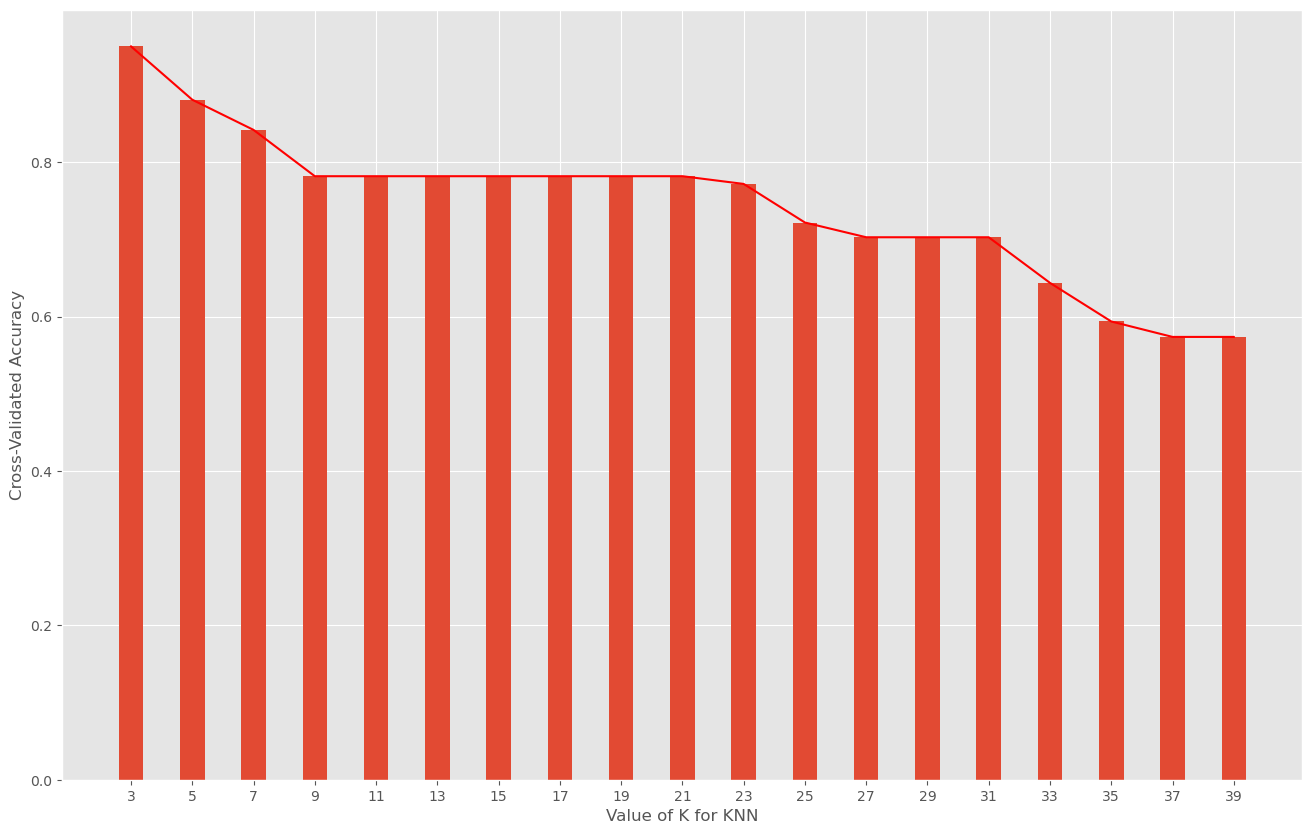

<Figure size 1200x800 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 20
k_range = [2*i+1 for i in range(1,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(12,8))
plt.show()

Text(0, 0.5, 'Error Rate')

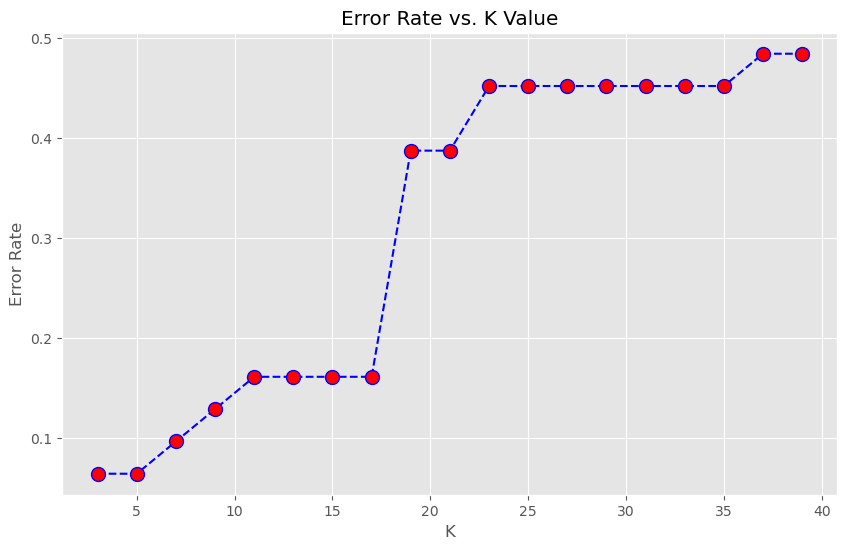

In [92]:
error_rate = []

# Will take some time
k_range = [i for i in range(3,40, 2)]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(31,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3,40, 2)],error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after K>3 the error rate just tends to hover around 0-0.5 Let's retrain the model with that and check the classification report!

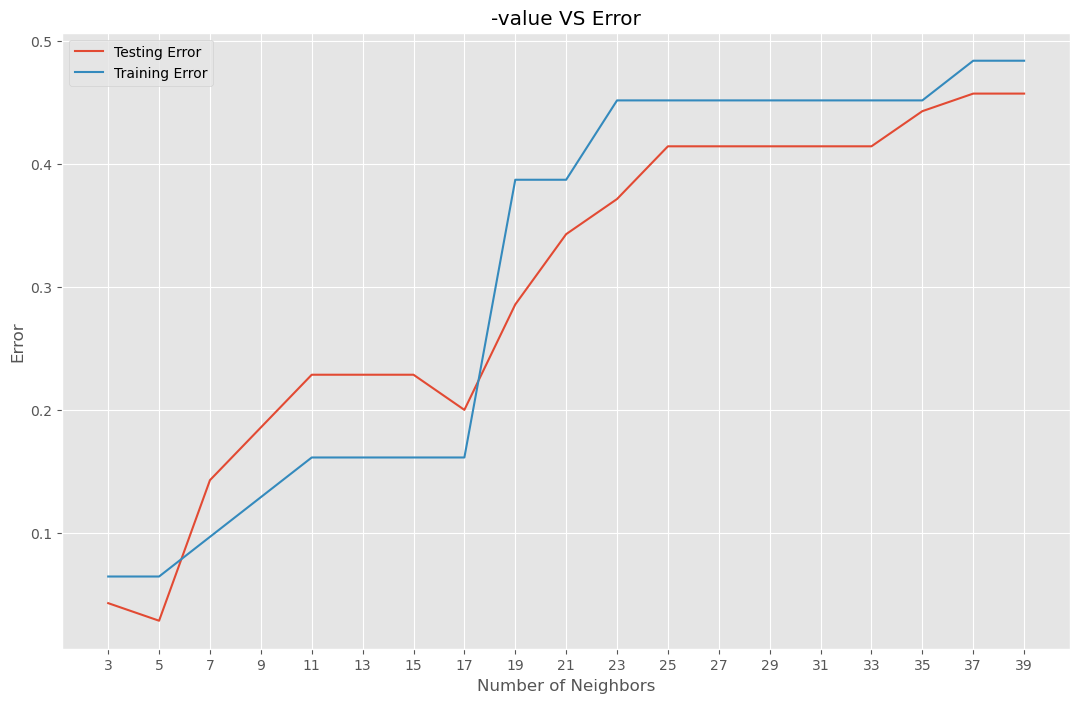

In [108]:
error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(70,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(31,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

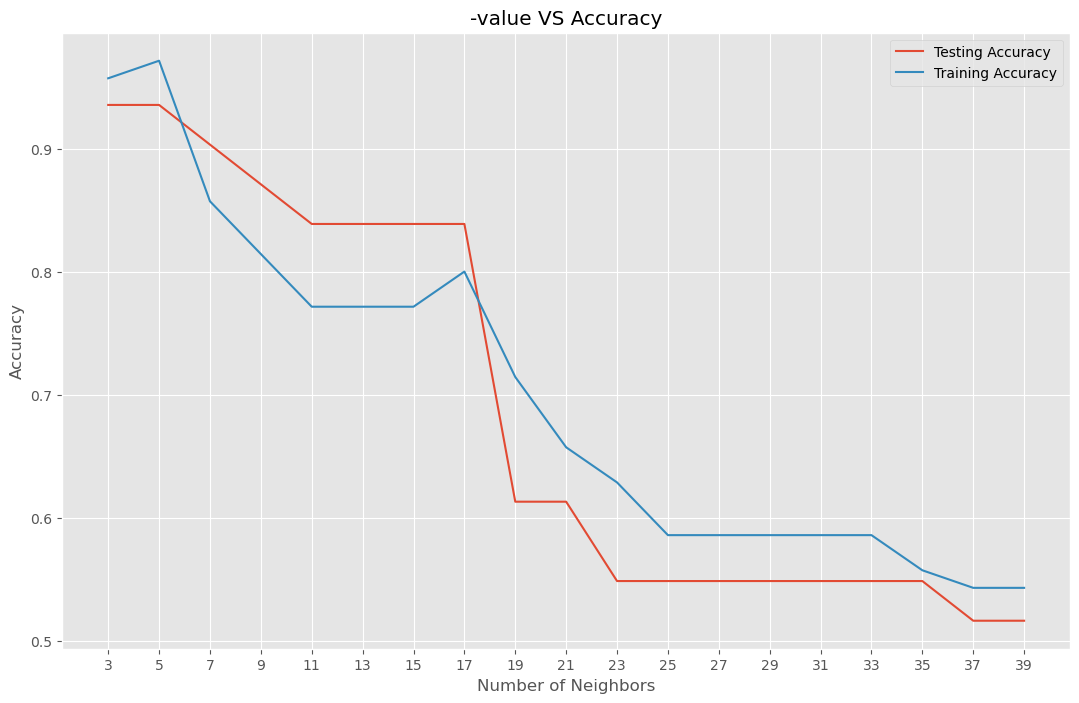

In [109]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()

### Applying KNN using K=3

In [112]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



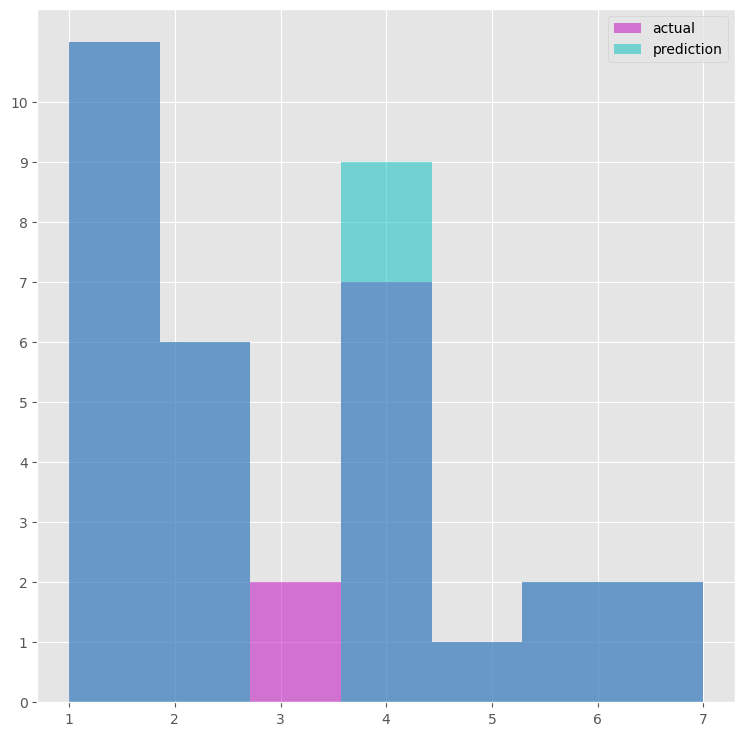

In [113]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

### Applying KNN using K=5

In [115]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



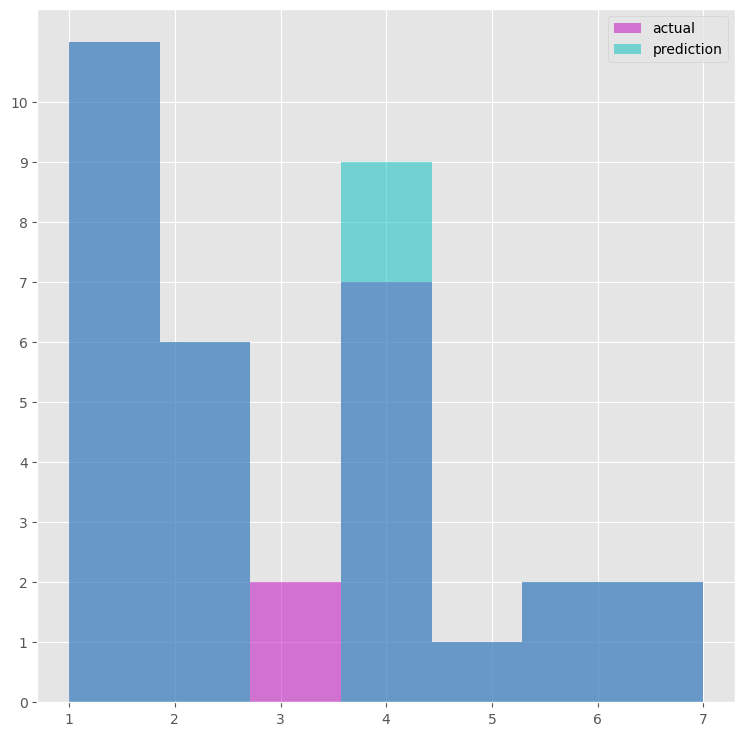

In [120]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

In [122]:
# Select columns to add to X and y sets
features = list(zoo.columns.values)
features.remove('legs')
features.remove('type')
features.remove('animal_name')
X2 = zoo[features]
y2 = zoo['type']
# Split X and y into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 0)

In [124]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X2_train,y2_train)
pred = knn.predict(X2_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y2_test,pred))
print('\n')
print(classification_report(y2_test,pred))

WITH K=5


[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



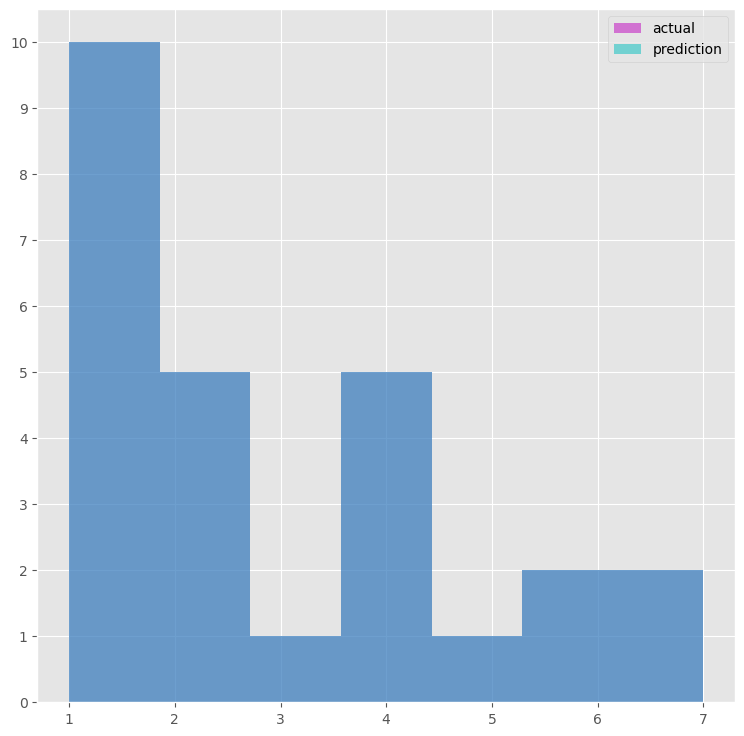

In [126]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y2_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()

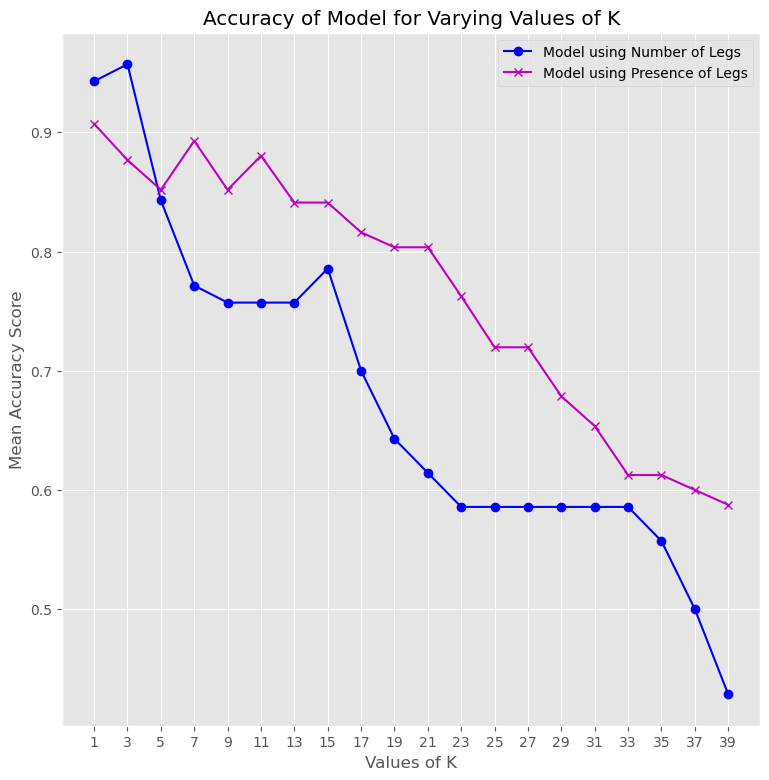

In [128]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train,y2_train)
    pred_i = knn2.predict(X2_test)
    score = cross_val_score(knn2,X2_train, y2_train,cv=10)
    mean_scores2.append(np.mean(score))
    error_rate2.append(np.mean(pred_i != y2_test))
    
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, color='b',marker='o', label='Model using Number of Legs')
plt.plot(k_list,mean_scores2, color='m',marker='x', label='Model using Presence of Legs')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

## Interview Questions

###  1. What are the key hyperparameters in KNN?

K-Nearest Neighbors (KNN) has several key hyperparameters that impact its performance:

Number of Neighbors (k) – Determines how many nearest neighbors are used to make a prediction. A small k may lead to overfitting, while a large k can smooth out predictions.

Distance Metric – Defines how similarity between points is measured. Common choices include:

Euclidean Distance (default): 
𝑑
(
𝑝
,
𝑞
)
=
∑
(
𝑝
𝑖
−
𝑞
𝑖
)
2
d(p,q)= 
∑(p 
i
​
 −q 
i
​
 ) 
2
 
​
 

Manhattan Distance: 
𝑑
(
𝑝
,
𝑞
)
=
∑
∣
𝑝
𝑖
−
𝑞
𝑖
∣
d(p,q)=∑∣p 
i
​
 −q 
i
​
 ∣

Minkowski Distance: Generalization of both Euclidean and Manhattan distances.

Weighting of Neighbors (weights) – Determines how the votes or distances of neighbors are considered:

Uniform (default): All neighbors contribute equally.

Distance-based: Closer neighbors have a higher influence.

Algorithm to Find Neighbors (algorithm) – Affects speed and efficiency:

‘auto’: Chooses the best approach automatically.

‘ball_tree’: Uses a Ball Tree structure for efficient searching.

‘kd_tree’: Uses a KD-Tree for faster nearest neighbor searches in low dimensions.

‘brute’: Uses brute-force search.

Leaf Size (leaf_size) – Used in BallTree and KDTree to balance speed and memory.

Power Parameter for Minkowski Distance (p) – Controls the type of distance metric:

p=1: Manhattan Distance

p=2: Euclidean Distance

### 2. What distance metrics can be used in KNN?

K-Nearest Neighbors (KNN) can use various distance metrics to measure the similarity between data points. The choice of metric significantly affects model performance. Here are the most common ones:

1. Euclidean Distance (Default)
Formula:

𝑑
(
𝑝
,
𝑞
)
=
∑
(
𝑝
𝑖
−
𝑞
𝑖
)
2
d(p,q)= 
∑(p 
i
​
 −q 
i
​
 ) 
2
 
​
 
Best for: Continuous numerical features.

Sensitive to: Large differences in feature scales (so normalization is recommended).

2. Manhattan Distance (Taxicab or L1 Distance)
Formula:

𝑑
(
𝑝
,
𝑞
)
=
∑
∣
𝑝
𝑖
−
𝑞
𝑖
∣
d(p,q)=∑∣p 
i
​
 −q 
i
​
 ∣
Best for: Grid-like data (e.g., city block distances).

Less sensitive to outliers than Euclidean.

3. Minkowski Distance (Generalized Distance Metric)
Formula:

𝑑
(
𝑝
,
𝑞
)
=
(
∑
∣
𝑝
𝑖
−
𝑞
𝑖
∣
𝑝
)
1
𝑝
d(p,q)=(∑∣p 
i
​
 −q 
i
​
 ∣ 
p
 ) 
p
1
​
 
 
Special cases:

If 
𝑝
=
1
p=1, it's Manhattan Distance.

If 
𝑝
=
2
p=2, it's Euclidean Distance.

Allows tuning 
𝑝
p to find an optimal distance measure.

4. Chebyshev Distance (Maximum Distance)
Formula:

𝑑
(
𝑝
,
𝑞
)
=
max
⁡
∣
𝑝
𝑖
−
𝑞
𝑖
∣
d(p,q)=max∣p 
i
​
 −q 
i
​
 ∣
Best for: Chessboard-style movements where diagonal moves are as costly as straight moves.

5. Cosine Similarity (Not a true distance but used in KNN)
Formula:

cos
⁡
(
𝜃
)
=
𝐴
⋅
𝐵
∣
∣
𝐴
∣
∣
∣
∣
𝐵
∣
∣
cos(θ)= 
∣∣A∣∣∣∣B∣∣
A⋅B
​
 
Best for: Text data, document similarity, and high-dimensional sparse data.

Measures angle rather than absolute distance.

6. Hamming Distance (For Categorical Data)
Formula:

𝑑
(
𝑝
,
𝑞
)
=
∑
(
𝑝
𝑖
≠
𝑞
𝑖
)
d(p,q)=∑(p 
i
​
 

=q 
i
​
 )
Best for: Binary or categorical data (e.g., DNA sequences, string comparisons).

7. Mahalanobis Distance (Accounts for Correlation Between Features)
Formula:

𝑑
(
𝑝
,
𝑞
)
=
(
𝑝
−
𝑞
)
𝑇
𝑆
−
1
(
𝑝
−
𝑞
)
d(p,q)= 
(p−q) 
T
 S 
−1
 (p−q)
​
 
Where 
𝑆
−
1
S 
−1
  is the inverse covariance matrix.

Best for: Data with correlated features.